In [1]:
%%bash
pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read in data into a dataframe

data = pd.read_csv('Hotel_Reviews.csv')

In [4]:
# Display top of dataframe

data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


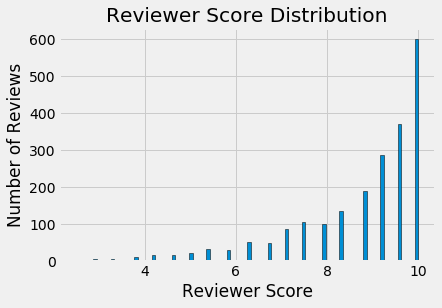

In [5]:
# Histogram of the Reviewer Score
plt.style.use('fivethirtyeight')
plt.hist(data['Reviewer_Score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Reviewer Score'); plt.ylabel('Number of Reviews');
plt.title('Reviewer Score Distribution');

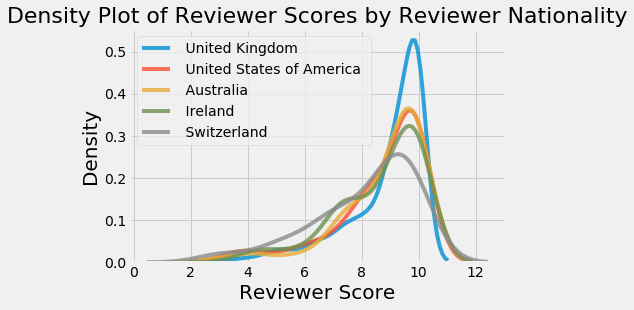

In [6]:
# Create a list of reviewer nationalities with more than 40 persons
types = data.dropna(subset=['Reviewer_Score'])
types = types['Reviewer_Nationality'].value_counts()
types = list(types[types.values > 40].index)

for b_type in types:
    # Select the Reviewer Nationality
    subset = data[data['Reviewer_Nationality'] == b_type]
    
    # Density plot of Reviewer scores
    sns.kdeplot(subset['Reviewer_Score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Reviewer Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Reviewer Scores by Reviewer Nationality', size = 22);

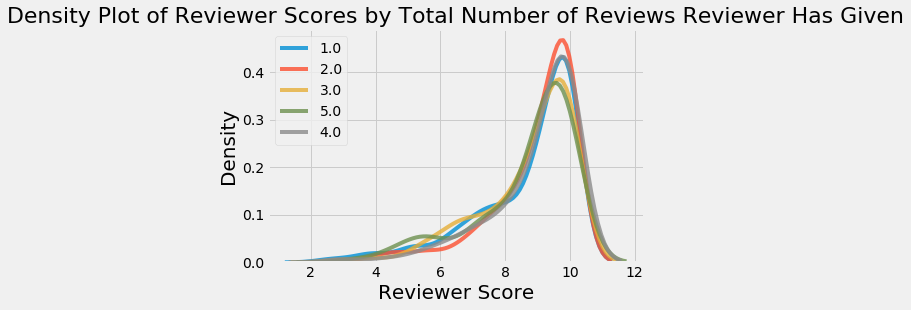

In [7]:
# Create a list of Total Number of Reviews Reviewer Has Given with more than 90 reviewers
types = data.dropna(subset=['Reviewer_Score'])
types = types['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts()
types = list(types[types.values > 90].index)

for b_type in types:
    # Select the Total Number of Reviews Reviewer Has Given
    subset = data[data['Total_Number_of_Reviews_Reviewer_Has_Given'] == b_type]
    
    # Density plot of Reviewer scores
    sns.kdeplot(subset['Reviewer_Score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Reviewer Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Reviewer Scores by Total Number of Reviews Reviewer Has Given', size = 22);

In [8]:
# Find all correlations with the score and sort
data.corr()['Reviewer_Score'].sort_values()

Review_Total_Negative_Word_Counts            -0.489771
lat                                          -0.284795
lng                                          -0.283932
Total_Number_of_Reviews_Reviewer_Has_Given   -0.025791
Total_Number_of_Reviews                       0.092777
Additional_Number_of_Scoring                  0.152276
Review_Total_Positive_Word_Counts             0.156759
Average_Score                                 0.422251
Reviewer_Score                                1.000000
Name: Reviewer_Score, dtype: float64

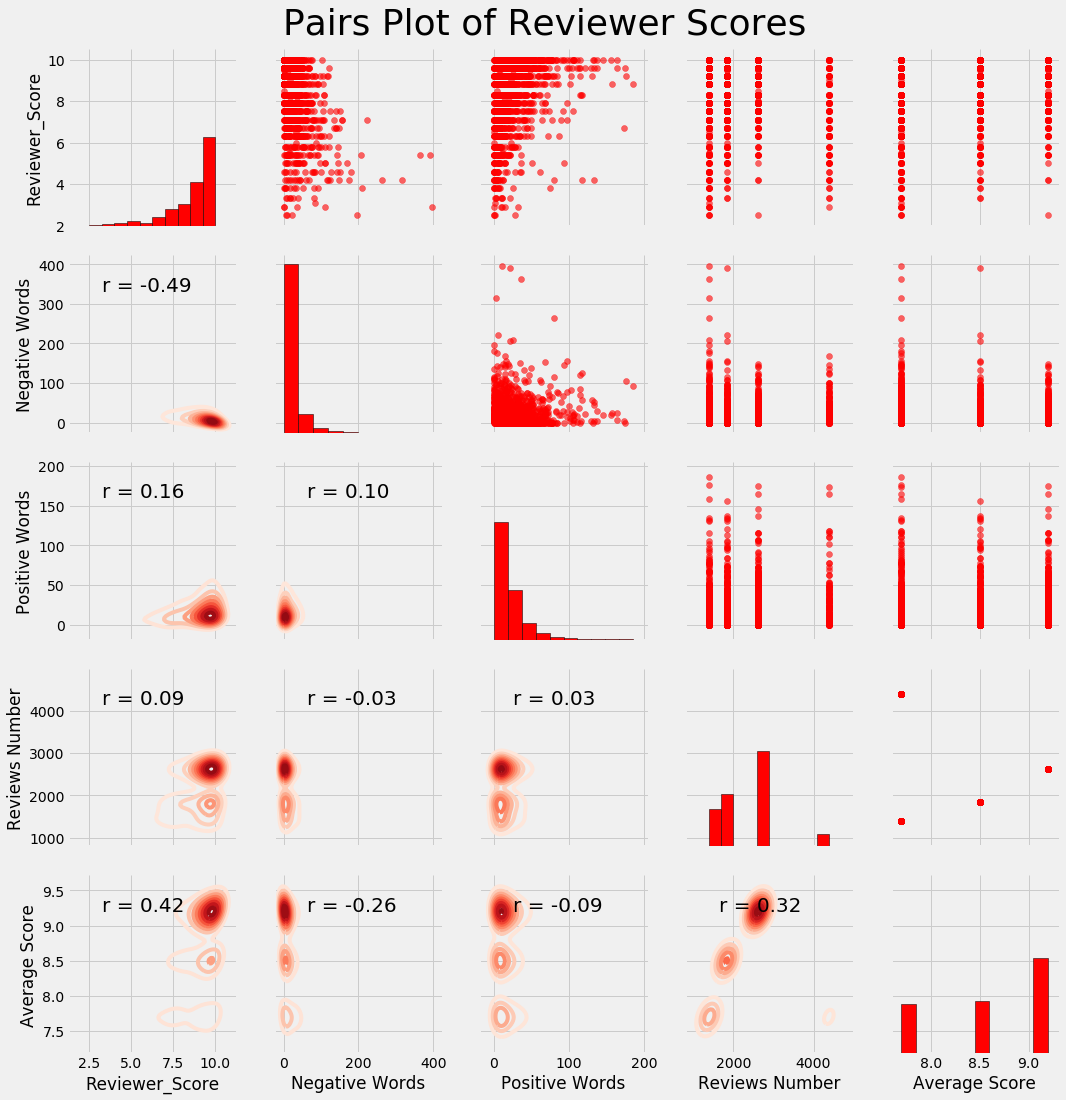

In [9]:
# Extract the columns to  plot
plot_data = data[['Reviewer_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts',
                  'Total_Number_of_Reviews', 
                  'Average_Score']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Review_Total_Negative_Word_Counts': 'Negative Words',
                                        'Review_Total_Positive_Word_Counts': 'Positive Words',
                                        'Total_Number_of_Reviews': 'Reviews Number',
                                        'Average_Score': 'Average Score'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Reviewer Scores', size = 36, y = 1.02);